In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv("dataset/clean_review_1.csv")

In [3]:
# Preprocessing teks
max_features = 1000  # Jumlah kata unik yang akan digunakan
tokenizer = Tokenizer(num_words=max_features, split=" ")
tokenizer.fit_on_texts(data["txt"].values)
X = tokenizer.texts_to_sequences(data["txt"].values)
X = pad_sequences(X)

In [4]:
# Preprocessing label
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(data["label"])

In [5]:
# Split data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [6]:
X_train.shape, X_test.shape

((256, 76), (64, 76))

In [7]:
len(Y_test == 0), len(Y_test == 1)

(64, 64)

In [8]:
embedding_dim = 256
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embedding_dim))  # Hapus input_length
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [9]:
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=8, 
                           verbose=1, 
                           restore_best_weights=True)

In [10]:

# Training model
batch_size = 64
epochs = 50
history = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
    )

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.5078 - loss: 0.6920 - val_accuracy: 0.5938 - val_loss: 0.6828
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7786 - loss: 0.6751 - val_accuracy: 0.7812 - val_loss: 0.6663
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9094 - loss: 0.6419 - val_accuracy: 0.8438 - val_loss: 0.6241
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9151 - loss: 0.5669 - val_accuracy: 0.7656 - val_loss: 0.5373
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8885 - loss: 0.4364 - val_accuracy: 0.7969 - val_loss: 0.4371
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9479 - loss: 0.2731 - val_accuracy: 0.9531 - val_loss: 0.3013
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9276 - loss: 0.2361 - val_accuracy: 0.8906 - val_loss: 0.3349
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9557 - loss: 0.1850 - val_accuracy: 0.9219 - val_loss: 0.299

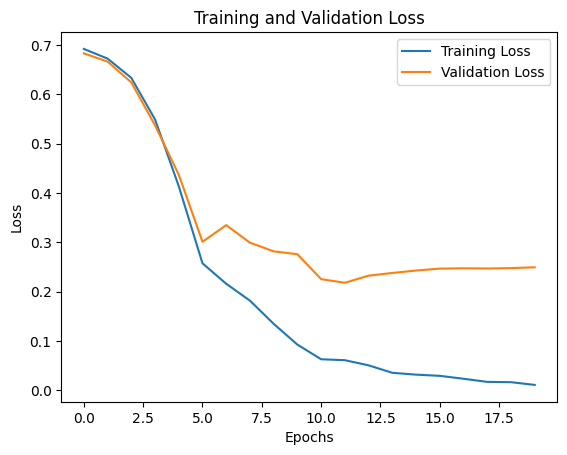

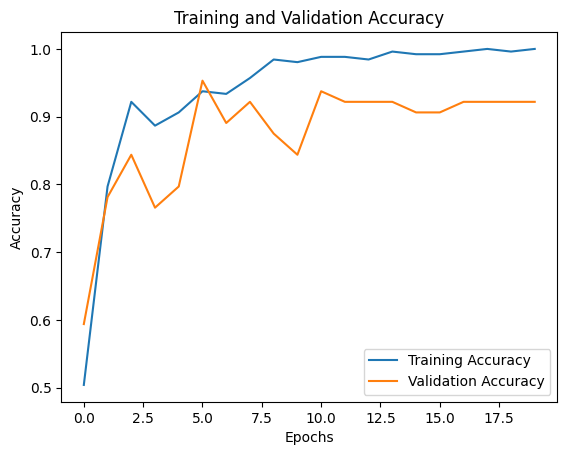

In [11]:
# Visualisasi Loss dan Akurasi
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9167 - loss: 0.2491 
Loss: 0.21819908916950226
Accuracy: 0.921875


In [13]:
import os
import json

# Buat folder jika belum ada
if not os.path.exists("model"):
    os.makedirs("model")

# Simpan riwayat pelatihan ke file JSON
with open("model/training_history.json", "w") as file:
    json.dump(history.history, file)

# Simpan model ke file
model.save("model/saved_model.keras")
model.save_weights("model/model_weights.weights.h5")
